In [5]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install torch
!pip install matplotlib
!pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
sensor1 = pd.read_csv("raw_data/g1_sensor1.csv",names=["time","normal","type1","type2","type3"])
sensor2 = pd.read_csv("raw_data/g1_sensor2.csv",names=["time","normal","type1","type2","type3"])
sensor3 = pd.read_csv("raw_data/g1_sensor3.csv",names=["time","normal","type1","type2","type3"])
sensor4 = pd.read_csv("raw_data/g1_sensor4.csv",names=["time","normal","type1","type2","type3"])

In [3]:
print("sensor 1의 데이터 크기",sensor1.shape)
print("sensor 1의 데이터 크기",sensor2.shape)
print("sensor 1의 데이터 크기",sensor3.shape)
print("sensor 1의 데이터 크기",sensor4.shape)

sensor 1의 데이터 크기 (190218, 5)
sensor 1의 데이터 크기 (184211, 5)
sensor 1의 데이터 크기 (196079, 5)
sensor 1의 데이터 크기 (183969, 5)


In [7]:
from scipy import interpolate
x_new = np.arange(0,140,0.001)
y_new1 = []
y_new2 = []
y_new3 = []
y_new4 = []

for item in ["normal","type1","type2","type3"]:
    f_linear1 = interpolate.interp1d(sensor1["time"],sensor1[item],kind="linear");y_new1.append(f_linear1(x_new))
    f_linear2 = interpolate.interp1d(sensor2["time"],sensor2[item],kind="linear");y_new2.append(f_linear2(x_new))
    f_linear3 = interpolate.interp1d(sensor3["time"],sensor3[item],kind="linear");y_new3.append(f_linear3(x_new))
    f_linear4 = interpolate.interp1d(sensor4["time"],sensor4[item],kind="linear");y_new4.append(f_linear4(x_new))


In [8]:
sensor1

,time,normal,type1,type2,type3
0,0.000000,-0.853307,-3.464579,0.555219,3.919664
1,0.000736,-0.740463,-2.448986,-0.234687,4.145351
2,0.001472,-0.138630,-1.922383,-0.009000,2.941685
3,0.002208,0.049443,-0.906790,-0.272301,2.603155
4,0.002944,-0.289088,-0.568259,-0.986978,1.361874
...,...,...,...,...,...
190213,139.996768,-1.156354,-2.696750,0.844491,-2.109427
190214,139.997504,-0.930666,-1.380241,0.919720,-2.222270
190215,139.998240,-0.554521,-2.132532,0.731647,-2.109427
190216,139.998976,-1.419655,-2.433448,1.183022,-3.087405


In [9]:
normal_ = pd.concat([sensor1["normal"],sensor2["normal"],sensor3["normal"],sensor4["normal"]],axis=1)
type1_ = pd.concat([sensor1["type1"],sensor2["type1"],sensor3["type1"],sensor4["type1"]],axis=1)
type2_ = pd.concat([sensor1["type2"],sensor2["type2"],sensor3["type2"],sensor4["type2"]],axis=1)
type3_ = pd.concat([sensor1["type3"],sensor2["type3"],sensor3["type3"],sensor4["type3"]],axis=1)

normal_.columns = ["s1","s2","s3","s4"];type1_.columns = ["s1","s2","s3","s4"];type2_.columns = ["s1","s2","s3","s4"];type3_.columns = ["s1","s2","s3","s4"]

In [10]:
normal_

,s1,s2,s3,s4
0,-0.853307,0.048823,-0.437626,-1.116226
1,-0.740463,-0.029477,-0.437626,-0.379672
2,-0.138630,-0.029477,0.280889,-1.271290
3,0.049443,0.009673,0.280889,-0.612268
4,-0.289088,0.009673,-0.257997,-0.689800
...,...,...,...,...
196074,NaN,NaN,-0.257427,NaN
196075,NaN,NaN,0.146738,NaN
196076,NaN,NaN,0.371273,NaN
196077,NaN,NaN,0.416181,NaN


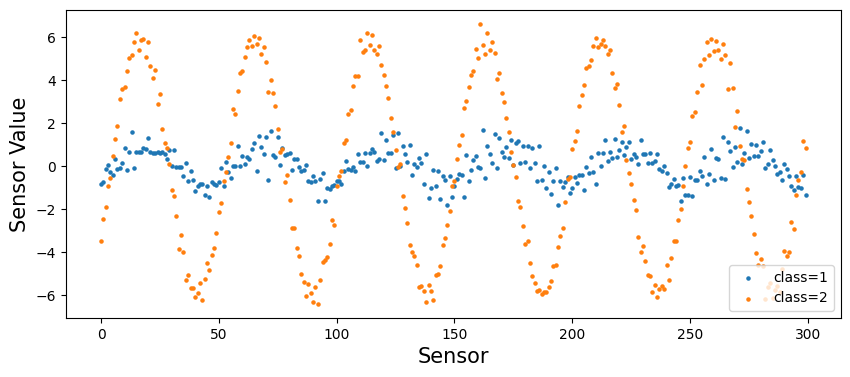

In [11]:
plt.figure(figsize=(10,4))
plt.scatter(range(0,300),normal_["s1"][:300],label="class="+str(1),marker='o',s =5)
plt.scatter(range(0,300),type1_["s1"][:300],label="class="+str(2),marker='o',s =5)

plt.legend(loc="lower right")
plt.xlabel("Sensor",fontsize=15)
plt.ylabel("Sensor Value",fontsize=15)
plt.show()
plt.close()

<Axes: >

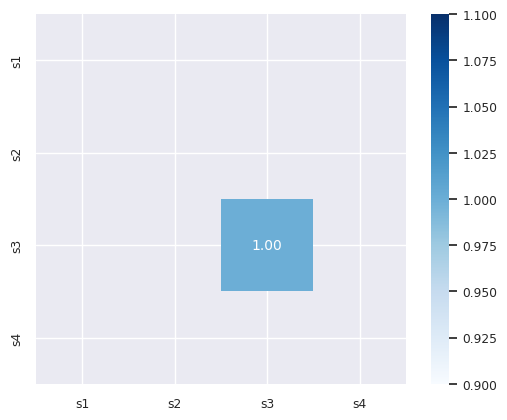

In [12]:
names = ["s1","s2","s3","s4"]
cm = np.corrcoef(normal_[names].values.T)
sns.set(font_scale=0.8)
sns.heatmap(cm,annot=True,square=True,fmt=".2f",annot_kws={"size":10},yticklabels=names,xticklabels=names,cmap=plt.cm.Blues)
